In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import toolbox_ML as tb

In [2]:
df = pd.read_csv("./data/datos_nasdaq.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Fecha     504 non-null    object
 1   Último    504 non-null    object
 2   Apertura  504 non-null    object
 3   Máximo    504 non-null    object
 4   Mínimo    504 non-null    object
 5   Vol.      503 non-null    object
 6   % var.    504 non-null    object
dtypes: object(7)
memory usage: 27.7+ KB


In [4]:
df.describe()

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
count,504,504,504,504,504,503,504
unique,504,504,504,504,503,492,348
top,30.11.2023,"15.947,87","15.986,40","16.011,98","11.235,74","249,11M","-1,10%"
freq,1,1,1,1,2,2,5


In [5]:
df.head()

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,30.11.2023,"15.947,87","15.986,40","16.011,98","15.825,83","444,54M","-0,25%"
1,29.11.2023,"15.987,60","16.111,59","16.166,18","15.976,69","230,98M","-0,14%"
2,28.11.2023,"16.010,43","15.939,12","16.031,38","15.921,45","238,59M","0,30%"
3,27.11.2023,"15.961,98","15.971,05","16.045,30","15.933,04","215,45M","-0,11%"
4,24.11.2023,"15.980,11","15.972,89","16.007,42","15.940,62","68,57M","-0,13%"


In [6]:
col = ['Último', 'Apertura', 'Máximo', 'Mínimo']

for columna in col:
    df[columna] = df[columna].str.replace('.', '').str.replace(',', '.').astype(float)


In [7]:
df.dropna(inplace=True)

In [8]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d.%m.%Y')

In [9]:
df['Vol.'] = df['Vol.'].str.replace(',', '')

# Identificar las filas que contienen 'M'
m = df['Vol.'].str.endswith('M') & ~df['Vol.'].isna()

# Reemplazar 'M' por '', convertir a float y multiplicar por 1 millón
df.loc[m, 'Vol.'] = df.loc[m, 'Vol.'].str.replace('M', '').astype(float) * 1_000_000

# Convertir a float
df['Vol.'] = df['Vol.'].astype(float)



In [10]:
df['% var.'] = df['% var.'].str.rstrip('%').str.replace(',', '.').astype(float)

In [11]:
df

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,2023-11-30,15947.87,15986.40,16011.98,15825.83,4.445400e+10,-0.25
1,2023-11-29,15987.60,16111.59,16166.18,15976.69,2.309800e+10,-0.14
2,2023-11-28,16010.43,15939.12,16031.38,15921.45,2.385900e+10,0.30
3,2023-11-27,15961.98,15971.05,16045.30,15933.04,2.154500e+10,-0.11
4,2023-11-24,15980.11,15972.89,16007.42,15940.62,6.857000e+09,-0.13
...,...,...,...,...,...,...,...
499,2021-12-06,15846.16,15744.91,15898.59,15557.78,2.445300e+10,0.85
500,2021-12-03,15712.04,16039.41,16089.61,15543.31,2.876900e+10,-1.74
501,2021-12-02,15990.76,15791.30,16066.32,15770.92,2.521000e+10,0.71
502,2021-12-01,15877.72,16347.96,16427.19,15864.00,2.535500e+10,-1.60


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, 0 to 503
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     503 non-null    datetime64[ns]
 1   Último    503 non-null    float64       
 2   Apertura  503 non-null    float64       
 3   Máximo    503 non-null    float64       
 4   Mínimo    503 non-null    float64       
 5   Vol.      503 non-null    float64       
 6   % var.    503 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 31.4 KB


In [13]:
columnas = ['Último', 'Apertura', 'Máximo', 'Mínimo', 'Vol.', '% var.']

In [14]:
print(df.dtypes)

Fecha       datetime64[ns]
Último             float64
Apertura           float64
Máximo             float64
Mínimo             float64
Vol.               float64
% var.             float64
dtype: object


In [15]:
def example_function(parameter):
    """
    This is a function.

    - **Note:** This text is in bold.

    Parameters:
    - `parameter` (int): Description of the parameter.

    Returns:
    int: The result of the function.
    """
    # Function implementation
    return 42

In [16]:
help(example_function)

Help on function example_function in module __main__:

example_function(parameter)
    This is a function.
    
    - **Note:** This text is in bold.
    
    Parameters:
    - `parameter` (int): Description of the parameter.
    
    Returns:
    int: The result of the function.



In [17]:
tb.describe_df(df)



,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
Tipo de dato,datetime64[ns],float64,float64,float64,float64,float64,float64
Valores nulos (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores unicos,503,503,503,503,502,492,348
Cardinalidad (%),100.0,100.0,100.0,100.0,99.8,97.81,69.18


### Funcion: get_features_num_regression

Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad, además de un argumento 'umbral_corr', de tipo float que debe estar entre 0 y 1 y una variable float "pvalue" cuyo valor debe ser por defecto "None".

La función debe devolver una lista con las columnas numéricas del dataframe cuya correlación con la columna designada por "target_col" sea superior en valor absoluto al valor dado por "umbral_corr". Además si la variable "pvalue" es distinta de None, sólo devolvera las columnas numéricas cuya correlación supere el valor indicado y además supere el test de hipótesis con significación mayor o igual a 1-pvalue.

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

In [18]:

tb.get_features_num_regression(df, 'Mínimo', 0.3, pvalue=0.1)


[('Último', 0.9972805808746535, 0.0),
 ('Apertura', 0.9973535582132576, 0.0),
 ('Máximo', 0.9972570817269242, 0.0),
 ('Mínimo', 0.9999999999999999, 0.0)]

### Funcion: plot_features_num_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un valor de correlación ("umbral_corr", con valor 0 por defecto) y un argumento ("pvalue") con valor "None" por defecto.

Si la lista no está vacía, la función pintará una pairplot del dataframe considerando la columna designada por "target_col" y aquellas incluidas en "column" que cumplan que su correlación con "target_col" es superior en valor absoluto a "umbral_corr", y que, en el caso de ser pvalue diferente de "None", además cumplan el test de correlación para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

EXTRA: Se valorará adicionalmente el hecho de que si la lista de columnas a pintar es grande se pinten varios pairplot con un máximo de cinco columnas en cada pairplot (siendo siempre una de ellas la indicada por "target_col")

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_num_regresion`

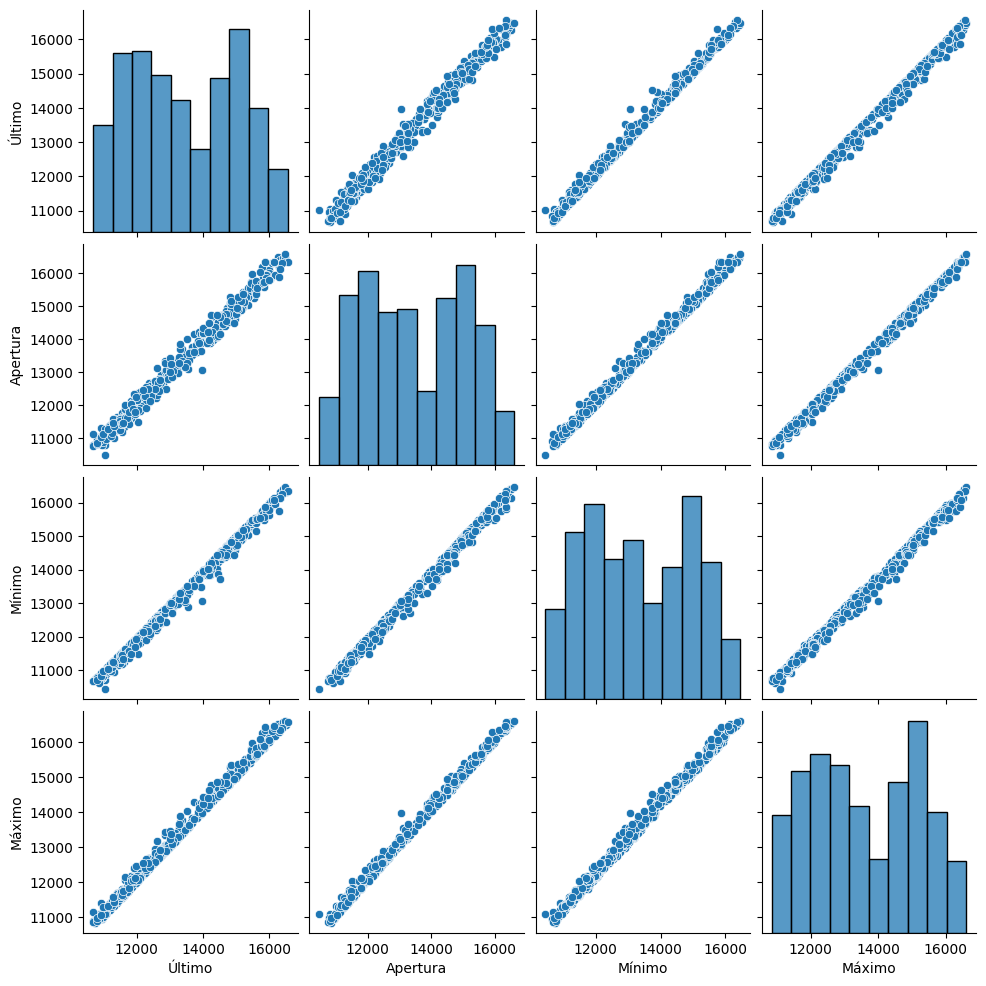

In [19]:
selected_cols = tb.plot_features_num_regression(df, target_col='Máximo', umbral_corr=0.5, pvalue=0.05)


### Funcion: get_features_cat_regression

Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad y una variable float "pvalue" cuyo valor por defecto será 0.05.

La función debe devolver una lista con las columnas categóricas del dataframe cuyo test de relación con la columna designada por 'target_col' supere en confianza estadística el test de relación que sea necesario hacer (es decir la función debe poder escoger cuál de los dos test que hemos aprendido tiene que hacer).

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

In [20]:
df["variacion"]="Bajó"
df.loc[df["% var."]>0,"variacion"]="Subió"
df.loc[df["% var."]==0.0,"variacion"]="Sin cambios"
df["variation"]="Decreased"
df.loc[df["% var."]>0,"variation"]="Increased"
df.loc[df["% var."]==0.0,"variation"]="No changes"

In [21]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import ast
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
def get_features_cat_regression(df:pd.DataFrame,target_col:str="", pvalue=0.05):
    """
    Función que devuelve una lista con las columnas categóricas del 
    dataframe cuyo test de relación con la columna designada por 
    'target_col' supere en confianza estadística el test de relación 
    que sea necesario 
    
    Argumentos:
    
    `df` (pandas.DataFrame): Variable que contiene dataframe de Pandas.
    
    `target_col` (string): Nombre de la columna target de un modelo de regresión
    
    `pvalue` (float): Valor de significación estadística. Por defecto valor 0.05

    Retorna:

    list: columnas categóricas del dataframe cuyo test de relación con la columna designada por 'target_col' supere en confianza estadística el test de relación que sea necesario hacer
    """
    
    lista_de_categoricas=list()
    # Verificamos si existe algún error al llamar a la columna 'target_col'
    if target_col not in df.columns:
        print(f"Error: La columna '{target_col}' no está bien indicada, no se puede asignar como 'target_col'.")
        return None
    # Verificamos si 'target_col' es una variable numérica continua
    if not np.issubdtype(df[target_col].dtype, np.number):
        print(f"Error: La columna '{target_col}' no es una variable numérica continua.")
        return None
    # Verificamos si 'pvalue' es un valor válido
    if pvalue is not None and (not isinstance(pvalue, (float, int)) or pvalue <= 0 or pvalue >= 1):
        print("Error: Si 'pvalue' no es 'None', debe tener un valor entre (0, 1).")
        return None
    #realizar test de relación de confianza
    #print("Test de correlación")
    df_categoricas=df.drop(target_col,axis=1)
    
    for columna in df_categoricas.columns:
        if not np.issubdtype(df[columna].dtype, np.number):
            if not np.issubdtype(df[columna].dtype, np.datetime64):
                lista_de_categoricas.append(columna)
            #print("lista_de_categoricas:",lista_de_categoricas)

    #score=0
    #score_ttest_ind=ttest_ind()
    #score_ttest_rel=ttest_rel()
    #score_ttest_1samp=ttest_1samp()
    #score_chi2_contingency=chi2_contingency()
    #df_unique_values = pd.DataFrame(columns=lista_de_categoricas)
    #for columna in lista_de_categoricas:
    #for valor in lista_de_categoricas:
    #       df_unique_values[valor] = df_categoricas.groupby(valor)[valor].size()
    #df_unique_values = df_categoricas[lista_de_categoricas].copy()
    #df_unique_values = df_unique_values.drop_duplicates(inplace=True)
    #   df_unique_values[columna]=df_categoricas[columna].drop_duplicates()
    #print(df_unique_values)
    #dictionary_values= dict()
    statistic_test=list()
    selected_columns = []
    for columna in lista_de_categoricas:#averiguo los valores únicos
        unique_values=df[columna].unique()
        parametros="" # para formar la llamada dinámicamente a t-test y chi cuadrado
        for valor in unique_values:
            parametros=parametros + f'df["{target_col}"][df["{columna}"]=="{valor}"]'
            if valor != unique_values[len(unique_values)-1]:
                parametros=parametros + ","
        
        #print("parametros:",parametros)

        # Create a dictionary to store variable values
        variables = {}
        # Execute the dynamic code and capture variables in the dictionary
        exec(f"t_statistic,p_value = f_oneway({parametros})", globals(), variables) #este si
        #exec(f"t_statistic,p_value = f_oneway({parametros})",globals(),locals(),variables) #este si
        if variables['p_value']<pvalue:#corregido
            selected_columns.append(columna)
        else:
            variables = {}
            sentencia=f"chi2_stat, p_value, dof, expected = chi2_contingency(pd.crosstab(df['{columna}'], df['{target_col}']))"#no es lo correcto u-mann whitney
            #print("sentencia:",sentencia)
            exec(sentencia, globals(), variables)
            if variables['p_value']<pvalue:#corregido
                selected_columns.append(columna)
        if not selected_columns:
            print("No hay columnas que cumplan con los criterios de selección.")
            return None      
        else:
            return selected_columns


In [22]:
tb.get_features_cat_regression(df,"Vol.",0.9)

['variacion', 'variation']

### Funcion: plot_features_cat_regression
Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un argumento ("pvalue") con valor 0.05 por defecto y un argumento "with_individual_plot" a False.

Si la lista no está vacía, la función pintará los histogramas agrupados de la variable "target_col" para cada uno de los valores de las variables categóricas incluidas en columns que cumplan que su test de relación con "target_col" es significatio para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_cat_regression`.

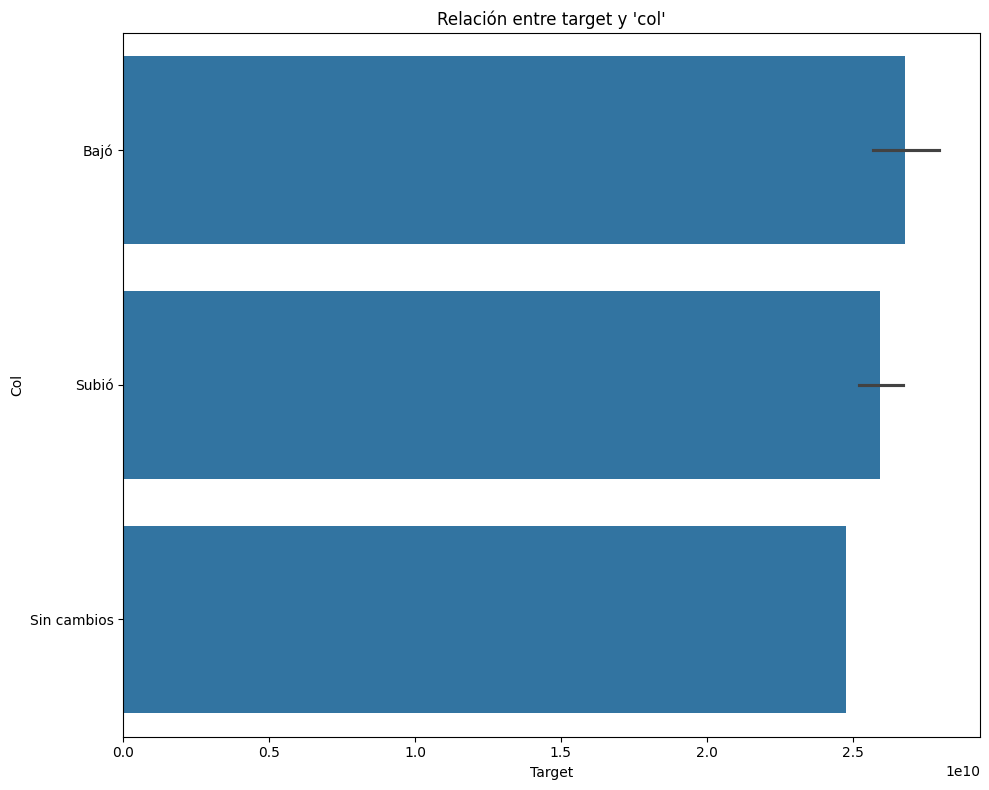

['variacion']

In [24]:
tb.plot_features_cat_regression(df,"Vol.",["variacion"],0.05,True)